# import

In [540]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image 

axe ro bede   ball.webp


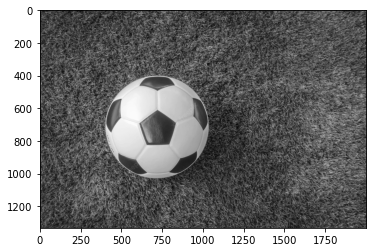

In [541]:
image = input("axe ro bede   ")
image_org = cv2.imread(image)
# gray 
image_geay = cv2.cvtColor(image_org, cv2.COLOR_BGR2GRAY)
plt.imshow(image_geay, cmap="gray")

# Histogram equalization 

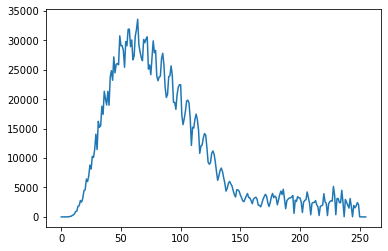

In [528]:
hist = np.zeros((256), dtype=int)
r , c = image_geay.shape
for i in range(r):
    for j in range(c):
        index = image_geay[i,j]
        hist[index]+=1

plt.plot(hist)

In [529]:
#flatten image array 
hist = np.bincount(image_geay.flatten(), minlength=256)

#normalize
num_pixels = np.sum(hist)
histogram_array = hist/num_pixels

#cumulative histogram
chistogram_array = np.cumsum(histogram_array)


In [531]:
# 1D
img_list = list(image_geay.flatten())

# transform pixel values to equalize
eq_img_list = [np.floor(255 * hist).astype(np.uint8)[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), image_geay.shape)

<Figure size 432x288 with 0 Axes>

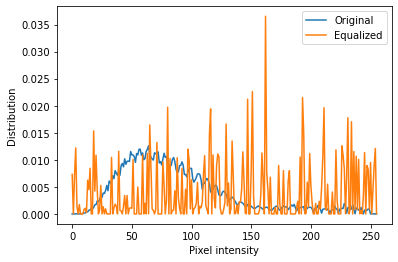

<Figure size 432x288 with 0 Axes>

In [532]:
#histogram and cumulative histogram of original image has been calculated above
ori_cdf = chistogram_array
ori_pdf = histogram_array


#calculate histogram and cumulative histogram of equalized image

#flatten image array
eq_histogram_array = np.bincount(eq_img_array.flatten(), minlength=256)

#normalize
num_pixels = np.sum(eq_histogram_array)
eq_pdf = eq_histogram_array/num_pixels

#cumulative histogram
eq_cdf = np.cumsum(eq_pdf)

plt.figure()
plt.plot(ori_pdf)
plt.plot(eq_pdf)
plt.xlabel('Pixel intensity')
plt.ylabel('Distribution')
plt.legend(['Original','Equalized'])
plt.figure()

# HSI / HSV

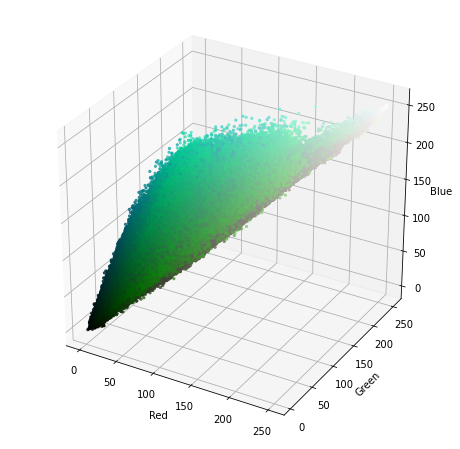

In [443]:
R, G, B = cv2.split(image_org)

pixel_colors = image_org.reshape((image_org.shape[0]*image_org.shape[1], 3)) / 255.0

fig = plt.figure(figsize=(8, 8))
axis = fig.add_subplot(projection="3d")
axis.scatter(R.flatten(), G.flatten(), B.flatten(), facecolors=pixel_colors, marker='.')
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

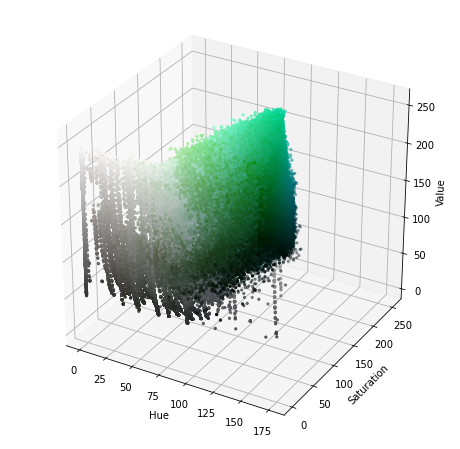

In [444]:
ball_hsv = cv2.cvtColor(image_org, cv2.COLOR_RGB2HSV)
H, S, V = cv2.split(ball_hsv)

fig = plt.figure(figsize=(8, 8))
axis = fig.add_subplot(projection="3d")
axis.scatter(H.flatten(), S.flatten(), V.flatten(), facecolors=pixel_colors, marker='.')
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

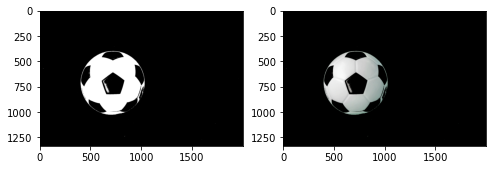

In [445]:
light_white = (0, 0, 155)
dark_white = (180, 60, 255)

mask_white = cv2.inRange(ball_hsv, light_white, dark_white)
result = cv2.bitwise_and(image_org, image_org, mask=mask_white)

fig = plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

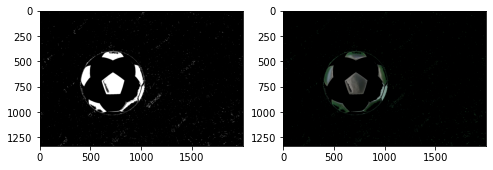

In [446]:

light_balck = np.array([0, 0, 0])
dark_black = np.array([350,165,160])



mask_black = cv2.inRange(ball_hsv, light_balck, dark_black)
result = cv2.bitwise_and(image_org, image_org, mask=mask_black)

fig = plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(mask_black, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

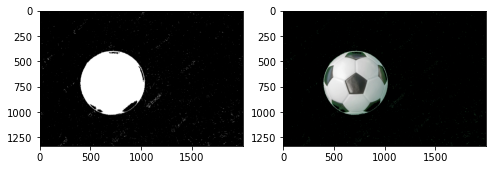

In [447]:
final_mask = mask_white + mask_black
final_result = cv2.bitwise_and(image_org, image_org, mask=final_mask)


fig = plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

# Hough

In [538]:
gray = cv2.medianBlur(final_mask, 5)

rows = gray.shape[0]
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 0.5, rows / 8,
                           param1=40, param2=22,
                           minRadius=0, maxRadius=0)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(image_org, center, 1, (0, 255, 0), 10)
        # circle outline
        radius = i[2]
        cv2.circle(image_org, center, radius, (255, 0, 255), 10)

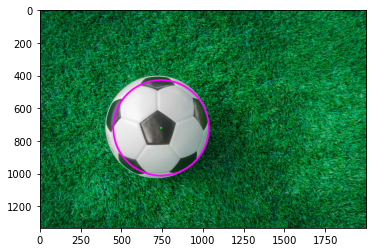

In [539]:
plt.imshow(image_org , 'gray')
